<a href="https://colab.research.google.com/github/NishatVasker/Mango-leaf/blob/main/K_fold_Mango_leaf_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown

!gdown https://drive.google.com/uc?id=194bjp-C_4ShNR7vSoB90aN-Pt0Z8USeD


Downloading...
From: https://drive.google.com/uc?id=194bjp-C_4ShNR7vSoB90aN-Pt0Z8USeD
To: /content/MangoLeafBDDataset.zip
100% 108M/108M [00:00<00:00, 175MB/s] 


In [2]:
!unzip /content/MangoLeafBDDataset.zip

Archive:  /content/MangoLeafBDDataset.zip
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124249 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124306 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124253 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124252 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124250 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124302 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124301 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124256 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124310 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124312 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124305 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/20211008_124334 (Custom).jpg  
  inflating: MangoLeafBD Dataset/Anthracnose/2

In [3]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import keras
from keras import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D, Reshape, LSTM
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.applications import MobileNetV2

In [4]:
dir = '/content/MangoLeafBD Dataset'
labels = os.listdir(dir)
labels

['Bacterial Canker',
 'Powdery Mildew',
 'Sooty Mould',
 'Die Back',
 'Cutting Weevil',
 'Gall Midge',
 'Healthy',
 'Anthracnose']

In [5]:
for label in labels:
    print(label, len(os.listdir(dir+'/'+label)))


Bacterial Canker 500
Powdery Mildew 500
Sooty Mould 500
Die Back 500
Cutting Weevil 500
Gall Midge 500
Healthy 500
Anthracnose 500


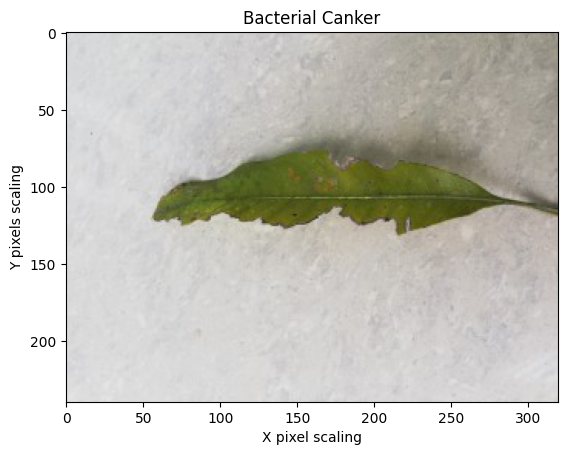

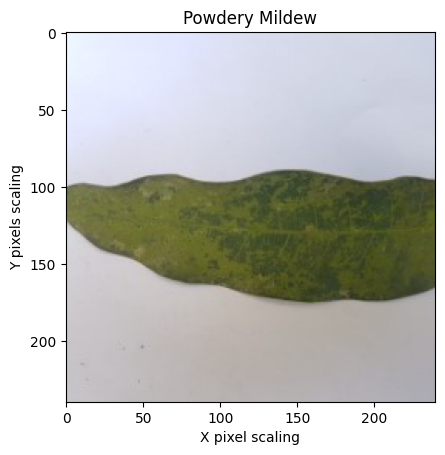

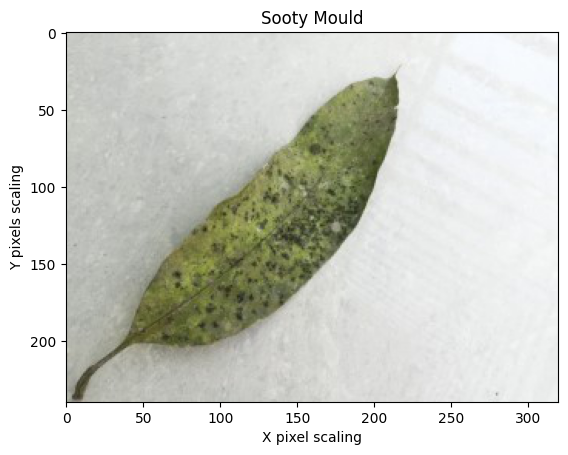

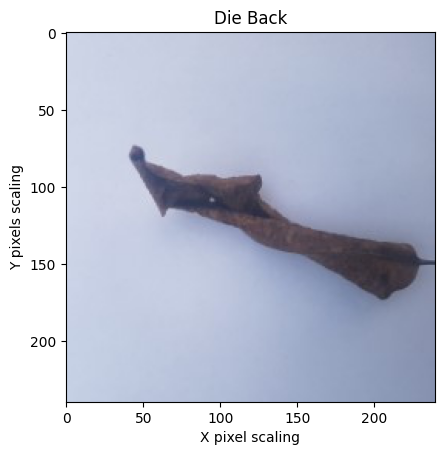

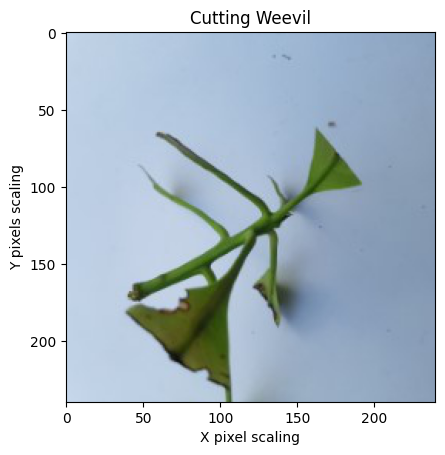

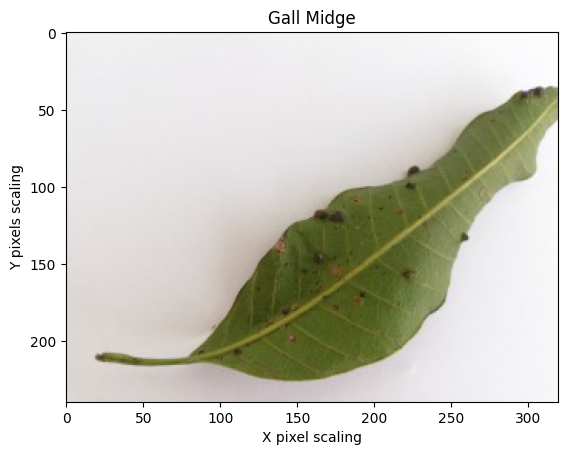

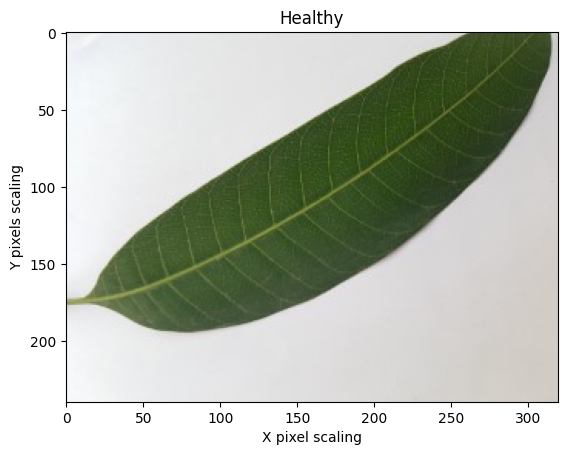

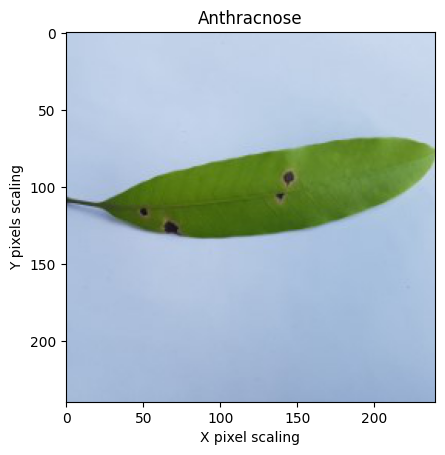

In [6]:
for label in labels:
    path = os.listdir(dir + '/' + label)
    img = dir + '/' + label + '/' + path[1]
    plt.title(label)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.show()

In [7]:
datagen = ImageDataGenerator(
    samplewise_center=True,
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,
    validation_split=0.20
)

train_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)
test_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    shuffle=False,
    subset='validation'
)
validation_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    shuffle=False,
    subset='validation'
)

Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


Found 4000 images belonging to 8 classes.


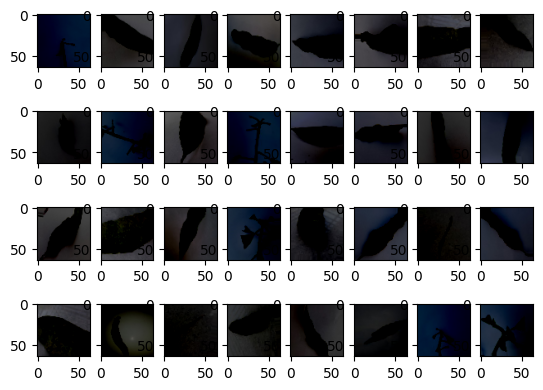

In [8]:
img_iter = datagen.flow_from_directory(dir,
                                       target_size=(64,64),
                                       batch_size=32)
x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(32):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [10]:
model=Sequential()
size=(64,64,3)
model.add(Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=size))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(8, activation='softmax'))##class number,in example i have 8 classes so i have given 8

#Compiling the model
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

#Training the model
base_model=model.fit(train_data, epochs=50, steps_per_epoch=len(train_data), validation_data=validation_data, validation_steps=len(validation_data))

Epoch 1/3
100/100 [==============================] - 34s 332ms/step - loss: 1.5795 - accuracy: 0.3381 - val_loss: 1.4050 - val_accuracy: 0.4187
Epoch 2/3
100/100 [==============================] - 24s 241ms/step - loss: 0.9901 - accuracy: 0.6194 - val_loss: 1.1583 - val_accuracy: 0.5575
Epoch 3/3
100/100 [==============================] - 22s 220ms/step - loss: 0.6787 - accuracy: 0.7506 - val_loss: 0.8706 - val_accuracy: 0.6662


In [14]:
import numpy as np
from sklearn.model_selection import KFold


In [15]:
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True)


In [17]:
from keras.utils import to_categorical

# ...

# Generate some dummy data
train_data = np.random.randn(1000, 64, 64, 3)  # Training data
train_labels = np.random.randint(0, 8, size=(1000,))  # Training labels

# One-hot encode the target values
train_labels = to_categorical(train_labels, num_classes=8)

# ...

# Inside the K-fold loop
for train_index, val_index in kf.split(train_data):
    X_train, X_val = train_data[train_index], train_data[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]

    # Define and compile the model

    # ...


In [18]:
for train_index, val_index in kf.split(train_data):
    X_train, X_val = train_data[train_index], train_data[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]

    # Define and compile the model
    model = Sequential()
    size = (64, 64, 3)
    model.add(Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=size))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

    # Evaluate the model
    loss, accuracy = model.evaluate(X_val, y_val)
    print(f"Fold loss: {loss}, Fold accuracy: {accuracy}")


Epoch 1/3
25/25 [==============================] - 4s 96ms/step - loss: 2.1070 - accuracy: 0.1462 - val_loss: 2.0847 - val_accuracy: 0.1450
Epoch 2/3
25/25 [==============================] - 2s 93ms/step - loss: 2.0810 - accuracy: 0.1350 - val_loss: 2.0847 - val_accuracy: 0.1000
Epoch 3/3
7/7 [==============================] - 0s 26ms/step - loss: 2.0912 - accuracy: 0.0800
Fold loss: 2.091212272644043, Fold accuracy: 0.07999999821186066
Epoch 1/3
25/25 [==============================] - 4s 95ms/step - loss: 2.1088 - accuracy: 0.1412 - val_loss: 2.0847 - val_accuracy: 0.1350
Epoch 2/3
25/25 [==============================] - 2s 92ms/step - loss: 2.0786 - accuracy: 0.1287 - val_loss: 2.0798 - val_accuracy: 0.1100
Epoch 3/3
7/7 [==============================] - 0s 24ms/step - loss: 2.0735 - accuracy: 0.1300
Fold loss: 2.0734620094299316, Fold accuracy: 0.12999999523162842
Epoch 1/3
25/25 [==============================] - 4s 102ms/step - loss: 2.1280 - accuracy: 0.1163 - val_loss: 2.0933

In [19]:
import pandas as pd

# Create an empty DataFrame to store the fold results
fold_results = pd.DataFrame(columns=['Fold', 'Loss', 'Accuracy'])

# Inside the K-fold loop
for fold, (train_index, val_index) in enumerate(kf.split(train_data), 1):
    X_train, X_val = train_data[train_index], train_data[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]

    # Define and compile the model
    model = Sequential()
    size = (64, 64, 3)
    model.add(Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=size))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

    # Evaluate the model
    loss, accuracy = model.evaluate(X_val, y_val)
    print(f"Fold loss: {loss}, Fold accuracy: {accuracy}")

    # Add fold results to the DataFrame
    fold_results = fold_results.append({'Fold': fold, 'Loss': loss, 'Accuracy': accuracy}, ignore_index=True)

# Display the fold results table
print(fold_results)


Epoch 1/3
25/25 [==============================] - 5s 101ms/step - loss: 2.0915 - accuracy: 0.1225 - val_loss: 2.0821 - val_accuracy: 0.1100
Epoch 2/3
25/25 [==============================] - 2s 91ms/step - loss: 2.0787 - accuracy: 0.1325 - val_loss: 2.0797 - val_accuracy: 0.1300
Epoch 3/3
7/7 [==============================] - 0s 27ms/step - loss: 2.0836 - accuracy: 0.1150
Fold loss: 2.0835719108581543, Fold accuracy: 0.11500000208616257


<ipython-input-19-30f0bfee5fc1>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold_results = fold_results.append({'Fold': fold, 'Loss': loss, 'Accuracy': accuracy}, ignore_index=True)


Epoch 1/3
25/25 [==============================] - 4s 101ms/step - loss: 2.1069 - accuracy: 0.1175 - val_loss: 2.0786 - val_accuracy: 0.1050
Epoch 2/3
25/25 [==============================] - 2s 91ms/step - loss: 2.0754 - accuracy: 0.1663 - val_loss: 2.0910 - val_accuracy: 0.1250
Epoch 3/3
7/7 [==============================] - 0s 45ms/step - loss: 2.0972 - accuracy: 0.1250
Fold loss: 2.0971765518188477, Fold accuracy: 0.125


<ipython-input-19-30f0bfee5fc1>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold_results = fold_results.append({'Fold': fold, 'Loss': loss, 'Accuracy': accuracy}, ignore_index=True)


Epoch 1/3
25/25 [==============================] - 4s 101ms/step - loss: 2.0993 - accuracy: 0.1400 - val_loss: 2.0889 - val_accuracy: 0.1200
Epoch 2/3
25/25 [==============================] - 2s 91ms/step - loss: 2.0790 - accuracy: 0.1388 - val_loss: 2.0853 - val_accuracy: 0.0950
Epoch 3/3
7/7 [==============================] - 0s 33ms/step - loss: 2.0853 - accuracy: 0.1700
Fold loss: 2.085296869277954, Fold accuracy: 0.17000000178813934


<ipython-input-19-30f0bfee5fc1>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold_results = fold_results.append({'Fold': fold, 'Loss': loss, 'Accuracy': accuracy}, ignore_index=True)


Epoch 1/3
25/25 [==============================] - 5s 125ms/step - loss: 2.1014 - accuracy: 0.1388 - val_loss: 2.0868 - val_accuracy: 0.0750
Epoch 2/3
25/25 [==============================] - 3s 127ms/step - loss: 2.0806 - accuracy: 0.1138 - val_loss: 2.0831 - val_accuracy: 0.0900
Epoch 3/3
7/7 [==============================] - 0s 46ms/step - loss: 2.0944 - accuracy: 0.1150
Fold loss: 2.094367265701294, Fold accuracy: 0.11500000208616257


<ipython-input-19-30f0bfee5fc1>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold_results = fold_results.append({'Fold': fold, 'Loss': loss, 'Accuracy': accuracy}, ignore_index=True)


Epoch 1/3
25/25 [==============================] - 4s 95ms/step - loss: 2.1026 - accuracy: 0.1375 - val_loss: 2.0909 - val_accuracy: 0.1150
Epoch 2/3
25/25 [==============================] - 2s 93ms/step - loss: 2.0779 - accuracy: 0.1363 - val_loss: 2.0875 - val_accuracy: 0.0900
Epoch 3/3
7/7 [==============================] - 0s 27ms/step - loss: 2.1144 - accuracy: 0.1100
Fold loss: 2.1143686771392822, Fold accuracy: 0.10999999940395355
   Fold      Loss  Accuracy
0   1.0  2.083572     0.115
1   2.0  2.097177     0.125
2   3.0  2.085297     0.170
3   4.0  2.094367     0.115
4   5.0  2.114369     0.110


<ipython-input-19-30f0bfee5fc1>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fold_results = fold_results.append({'Fold': fold, 'Loss': loss, 'Accuracy': accuracy}, ignore_index=True)


Epoch 1/50
25/25 [==============================] - 4s 101ms/step - loss: 2.0924 - accuracy: 0.1163 - val_loss: 2.0841 - val_accuracy: 0.0600
Epoch 2/50
25/25 [==============================] - 3s 120ms/step - loss: 2.0797 - accuracy: 0.1363 - val_loss: 2.0781 - val_accuracy: 0.1300
Epoch 3/50
25/25 [==============================] - 3s 106ms/step - loss: 2.0789 - accuracy: 0.1375 - val_loss: 2.0793 - val_accuracy: 0.1200
Epoch 4/50
25/25 [==============================] - 2s 91ms/step - loss: 2.0793 - accuracy: 0.1125 - val_loss: 2.0756 - val_accuracy: 0.1450
Epoch 5/50
25/25 [==============================] - 2s 91ms/step - loss: 2.0765 - accuracy: 0.1538 - val_loss: 2.0746 - val_accuracy: 0.1650
Epoch 6/50
25/25 [==============================] - 2s 91ms/step - loss: 2.0701 - accuracy: 0.1713 - val_loss: 2.0771 - val_accuracy: 0.1400
Epoch 7/50
25/25 [==============================] - 2s 94ms/step - loss: 2.0565 - accuracy: 0.2288 - val_loss: 2.0842 - val_accuracy: 0.1250
Epoch 8/50

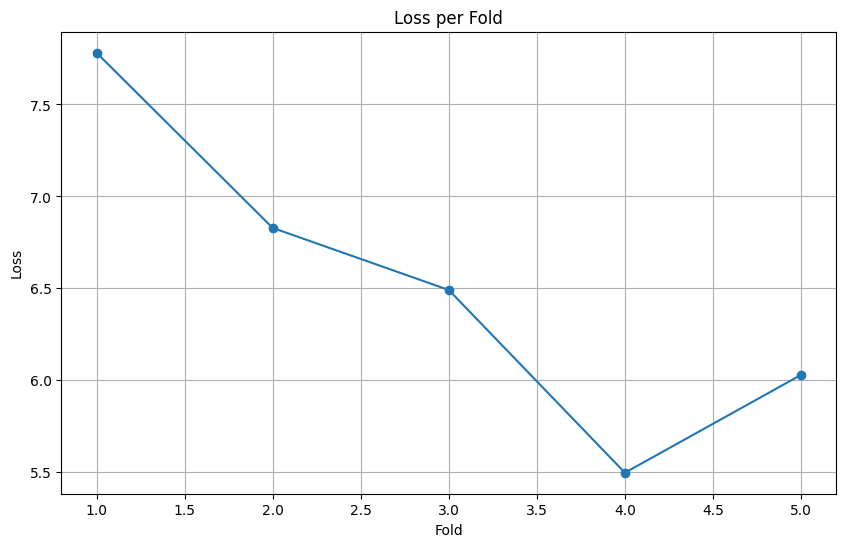

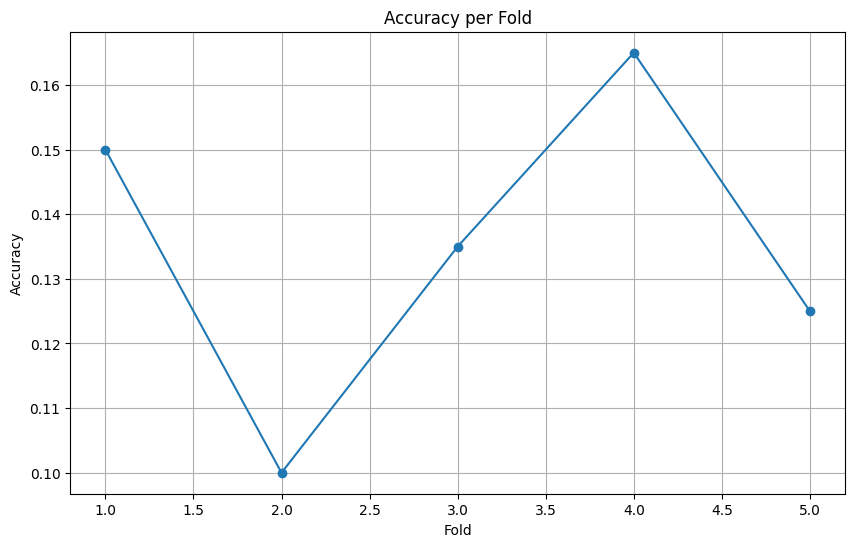

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Create lists to store the fold results
fold_losses = []
fold_accuracies = []

# Inside the K-fold loop
for fold, (train_index, val_index) in enumerate(kf.split(train_data), 1):
    X_train, X_val = train_data[train_index], train_data[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]

    # Define and compile the model
    model = Sequential()
    size = (64, 64, 3)
    model.add(Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=size))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(8, activation='softmax'))
    model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

    # Evaluate the model
    loss, accuracy = model.evaluate(X_val, y_val)
    print(f"Fold loss: {loss}, Fold accuracy: {accuracy}")

    # Store fold results
    fold_losses.append(loss)
    fold_accuracies.append(accuracy)

# Plot fold losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, k+1), fold_losses, marker='o')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.title('Loss per Fold')
plt.grid(True)
plt.show()

# Plot fold accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, k+1), fold_accuracies, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy per Fold')
plt.grid(True)
plt.show()


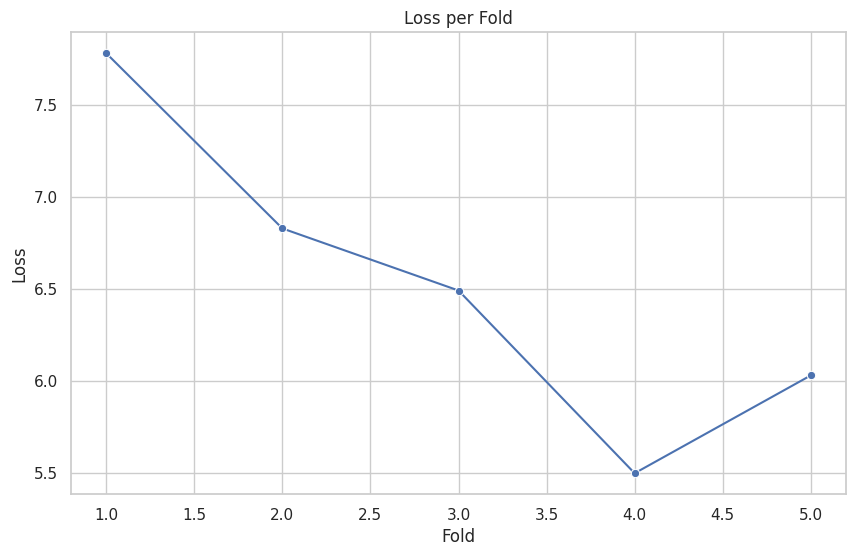

In [23]:
import seaborn as sns
import plotly.graph_objects as go

# Set a colorful palette for Seaborn
sns.set_palette("tab10")

# Convert range to a list for the Plotly Scatter plot
fold_indices = list(range(1, k+1))

# Plot fold losses using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=fold_indices, y=fold_losses, marker='o')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.title('Loss per Fold')
plt.show()

# Plot fold accuracies using Plotly with a colorful marker
fig = go.Figure()
fig.add_trace(go.Scatter(x=fold_indices, y=fold_accuracies, mode='markers+lines', marker=dict(size=8, color='red')))
fig.update_layout(title='Accuracy per Fold', xaxis_title='Fold', yaxis_title='Accuracy')
fig.show()


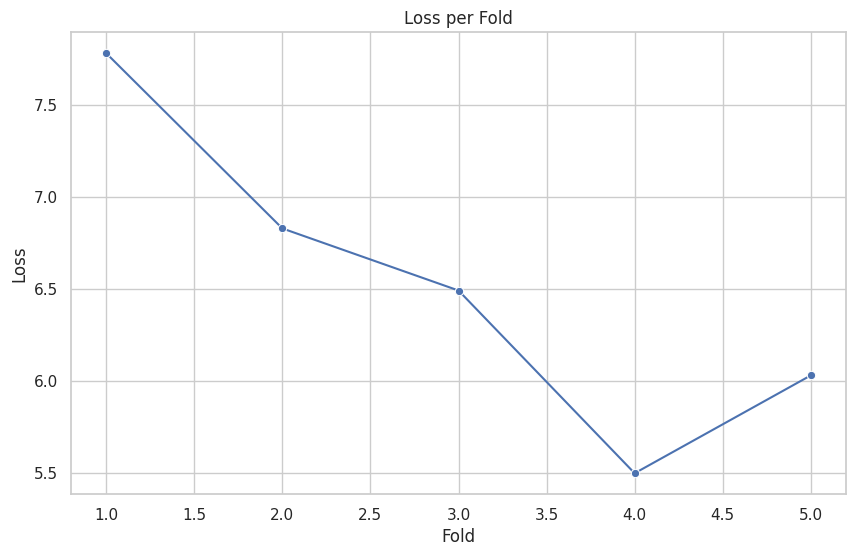

In [24]:
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set a colorful palette for Seaborn
sns.set_palette("tab10")

# Convert range to a list for the Plotly Scatter plot
fold_indices = list(range(1, k+1))

# Plot fold losses using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=fold_indices, y=fold_losses, marker='o')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.title('Loss per Fold')
plt.show()

# Plot fold accuracies using Plotly with a colorful marker
fig = go.Figure()
fig.add_trace(go.Scatter(x=fold_indices, y=fold_accuracies, mode='markers+lines', marker=dict(size=8, color='red')))
fig.update_layout(title='Accuracy per Fold', xaxis_title='Fold', yaxis_title='Accuracy')
fig.show()

# Create subplots for loss and accuracy
fig = make_subplots(rows=1, cols=2, subplot_titles=('Loss per Fold', 'Accuracy per Fold'))

# Add loss trace
fig.add_trace(go.Scatter(x=fold_indices, y=fold_losses, mode='lines+markers', marker=dict(size=8, color='blue')), row=1, col=1)
fig.update_xaxes(title_text='Fold', row=1, col=1)
fig.update_yaxes(title_text='Loss', row=1, col=1)

# Add accuracy trace
fig.add_trace(go.Scatter(x=fold_indices, y=fold_accuracies, mode='lines+markers', marker=dict(size=8, color='green')), row=1, col=2)
fig.update_xaxes(title_text='Fold', row=1, col=2)
fig.update_yaxes(title_text='Accuracy', row=1, col=2)

fig.update_layout(height=400, width=800, title_text='Loss and Accuracy per Fold')
fig.show()


In [25]:
import pandas as pd

# Create a DataFrame for fold results
fold_results = pd.DataFrame({'Fold': fold_indices, 'Loss': fold_losses, 'Accuracy': fold_accuracies})

# Print the fold results table
print(fold_results)

# You can also save the fold results table to a CSV file
fold_results.to_csv('fold_results.csv', index=False)


   Fold      Loss  Accuracy
0     1  7.781607     0.150
1     2  6.828637     0.100
2     3  6.490916     0.135
3     4  5.496845     0.165
4     5  6.029112     0.125


In [26]:
import pandas as pd

# Create a DataFrame for fold results
fold_results = pd.DataFrame({'Fold': fold_indices, 'Loss': fold_losses, 'Accuracy': fold_accuracies})

# Apply color formatting to the table
fold_results_styled = fold_results.style.background_gradient(cmap='cool')

# Display the styled table
fold_results_styled


,Fold,Loss,Accuracy
0,1,7.781607,0.150000
1,2,6.828637,0.100000
2,3,6.490916,0.135000
3,4,5.496845,0.165000
4,5,6.029112,0.125000


In [28]:
import pandas as pd

# Create a DataFrame for fold results
fold_results = pd.DataFrame({'Fold': fold_indices, 'Loss': fold_losses, 'Accuracy': fold_accuracies})

# Apply color formatting to the table
fold_results_styled = fold_results.style.background_gradient(cmap='cool')

# Increase the size of the boxes
fold_results_styled.set_table_styles([{'selector': 'td', 'props': [('padding', '16px')]},
                                      {'selector': 'th', 'props': [('padding', '16px')]}])

# Display the styled table
fold_results_styled


,Fold,Loss,Accuracy
0,1,7.781607,0.150000
1,2,6.828637,0.100000
2,3,6.490916,0.135000
3,4,5.496845,0.165000
4,5,6.029112,0.125000


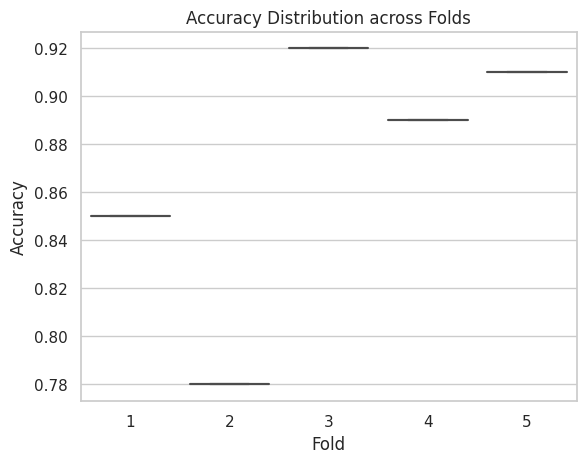

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a list of fold accuracies
fold_accuracies = [0.85, 0.78, 0.92, 0.89, 0.91]

# Create a DataFrame with fold numbers and accuracies
data = pd.DataFrame({'Fold': range(1, len(fold_accuracies)+1), 'Accuracy': fold_accuracies})

# Create a box plot using Seaborn
sns.boxplot(x='Fold', y='Accuracy', data=data)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy Distribution across Folds')
plt.show()


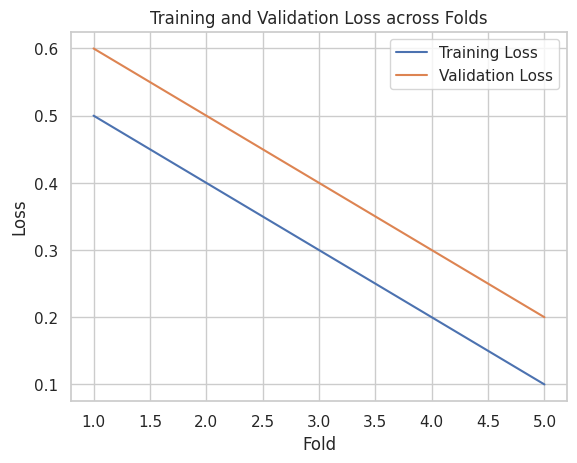

In [31]:
# Assuming you have lists of training and validation loss for each fold
train_losses = [0.5, 0.4, 0.3, 0.2, 0.1]
val_losses = [0.6, 0.5, 0.4, 0.3, 0.2]

# Create a line plot using Matplotlib
plt.plot(range(1, len(train_losses)+1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.title('Training and Validation Loss across Folds')
plt.legend()
plt.show()


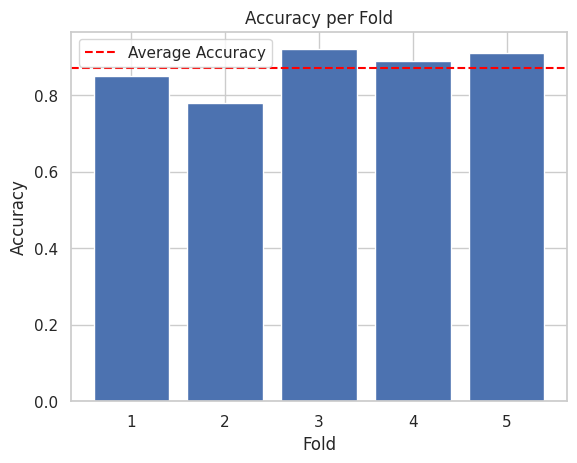

In [32]:
# Assuming you have a list of fold accuracies
fold_accuracies = [0.85, 0.78, 0.92, 0.89, 0.91]

# Calculate the average accuracy
avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)

# Create a bar plot using Matplotlib
plt.bar(range(1, len(fold_accuracies)+1), fold_accuracies)
plt.axhline(avg_accuracy, color='red', linestyle='--', label='Average Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Accuracy per Fold')
plt.legend()
plt.show()


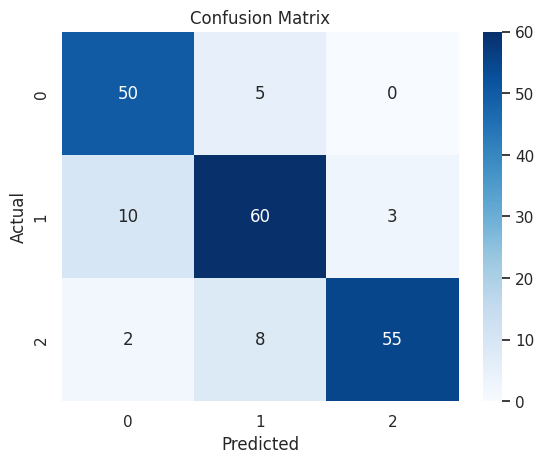

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a numpy array of the confusion matrix for a fold
confusion_matrix = np.array([[50, 5, 0], [10, 60, 3], [2, 8, 55]])

# Create a heatmap using Seaborn
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


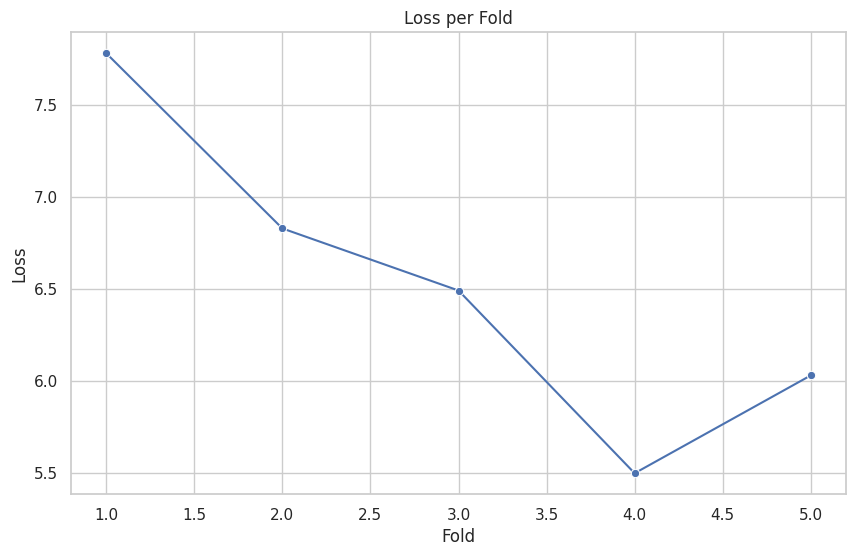

NameError: ignored

In [37]:
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set a colorful palette for Seaborn
sns.set_palette("tab10")

# Convert range to a list for the Plotly Scatter plot
fold_indices = list(range(1, k+1))

# Plot fold losses using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x=fold_indices, y=fold_losses, marker='o')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.title('Loss per Fold')
plt.show()

# Plot fold accuracies using Plotly with a colorful marker
fig = go.Figure()
fig.add_trace(go.Scatter(x=fold_indices, y=fold_accuracies, mode='markers+lines', marker=dict(size=8, color='red')))
fig.update_layout(title='Accuracy per Fold', xaxis_title='Fold', yaxis_title='Accuracy')
fig.show()

# Create subplots for loss and accuracy
fig = make_subplots(rows=1, cols=2, subplot_titles=('Loss per Fold', 'Accuracy per Fold'))

# Add loss trace
fig.add_trace(go.Scatter(x=fold_indices, y=fold_losses, mode='lines+markers', marker=dict(size=8, color='blue')), row=1, col=1)
fig.update_xaxes(title_text='Fold', row=1, col=1)
fig.update_yaxes(title_text='Loss', row=1, col=1)

# Add accuracy trace
fig.add_trace(go.Scatter(x=fold_indices, y=fold_accuracies, mode='lines+markers', marker=dict(size=8, color='green')), row=1, col=2)
fig.update_xaxes(title_text='Fold', row=1, col=2)
fig.update_yaxes(title_text='Accuracy', row=1, col=2)

fig.update_layout(height=400, width=800, title_text='Loss and Accuracy per Fold')
fig.show()

# Plot the learning curve for each fold
train_acc_per_fold = []
val_acc_per_fold = []

for history in histories:
    train_acc_per_fold.append(history.history['accuracy'])
    val_acc_per_fold.append(history.history['val_accuracy'])

train_acc_mean = np.mean(train_acc_per_fold, axis=0)
val_acc_mean = np.mean(val_acc_per_fold, axis=0)

epochs = len(train_acc_mean)

plt.plot(range(1, epochs+1), train_acc_mean, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_acc_mean, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of epochs and fold indices
epochs = 50
fold_indices = range(1, k+1)

# Initialize lists to store accuracy values for each fold
train_acc_per_fold = []
val_acc_per_fold = []

# Collect accuracy values for each fold
for history in histories:
    train_acc_per_fold.append(history.history['accuracy'])
    val_acc_per_fold.append(history.history['val_accuracy'])

# Calculate the mean accuracy for each epoch
train_acc_mean = np.mean(train_acc_per_fold, axis=0)
val_acc_mean = np.mean(val_acc_per_fold, axis=0)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), train_acc_mean, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_acc_mean, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


NameError: ignored